<table class="table table-bordered">
    <tr>
        <th style="text-align:center; width:25%"><img src='https://www.np.edu.sg/PublishingImages/Pages/default/odp/ICT.jpg' style="width: 250px; height: 125px; "></th>
        <th style="text-align:center;"><h1>Deep Learning</h1><h2>Assignment 1 - Food Classification Model (Individual)</h2><h3>AY2022/23 Semester</h3></th>
    </tr>
</table>

In [1]:
# Import the Required Packages
import os
import numpy as np
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers

In [2]:
# Keras + Checking Version
from tensorflow import keras
print('keras: ', keras.__version__)

keras:  2.10.0


In [3]:
# Check GPU
import tensorflow as tf

print(tf.config.list_physical_devices('GPU'))

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [4]:
# page width
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

C:\Users\user\AppData\Local\Temp\ipykernel_23412\2117274223.py:2: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


## Step 1: Data Loading

In [5]:
# Set the base directory
base_dir = 'C:\\Users\\user\\OneDrive\\Desktop\\School\\Y2\\SEM2\\DL\\Assignment 1\\a1_images'

# Set train, test and validation directory. Join to base
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

In [6]:
# Set image size
img_size = 150

## Step 2:  Develop the Image Classification Models

### Model #1

#### Model 1a (Baseline Model)

In [7]:
# Build the Model (1a)

# Baseline Model (2 Conv2D Layers)
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_size, img_size, 3)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(10, activation='softmax')) # 10 different foods 
# softmax as we a predicting for more than 2 classes

In [8]:
# Model Summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 146, 146, 64)      18496     
                                                                 
 dense (Dense)               (None, 146, 146, 512)     33280     
                                                                 
 dense_1 (Dense)             (None, 146, 146, 10)      5130      
                                                                 
Total params: 57,802
Trainable params: 57,802
Non-trainable params: 0
_________________________________________________________________


In [9]:
# Train the Model

# Compile the model
# categorical_crossentropy
model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(learning_rate=1e-4), # base learning rate=1e-4
              metrics=['acc'])

# Data Pre-processing (batch_size = 30)
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        # All images will be resized to 150x150
        target_size=(img_size, img_size),
        batch_size=30,
        class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(img_size, img_size),
        batch_size=30,
        class_mode='categorical')



Found 7500 images belonging to 10 classes.
Found 2000 images belonging to 10 classes.


In [10]:
# Check generator shapes
for data_batch, labels_batch in train_generator:
    print('Data Batch Shape:', data_batch.shape)
    tmp_plot=data_batch[0]
    print('Labels Batch Shape:', labels_batch.shape)
    break

Data Batch Shape: (30, 150, 150, 3)
Labels Batch Shape: (30, 10)


In [11]:
# Fit the model
# 100 epoch start
history = model.fit(
      train_generator,
      steps_per_epoch=250, #train_sample_size=7500/data_batch_size=30 (recalibrate)
      epochs=100, # increase epochs
      validation_data=validation_generator,
      validation_steps=50)

Epoch 1/100


ValueError: in user code:

    File "C:\ProgramData\Anaconda3\lib\site-packages\keras\engine\training.py", line 1160, in train_function  *
        return step_function(self, iterator)
    File "C:\ProgramData\Anaconda3\lib\site-packages\keras\engine\training.py", line 1146, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\ProgramData\Anaconda3\lib\site-packages\keras\engine\training.py", line 1135, in run_step  **
        outputs = model.train_step(data)
    File "C:\ProgramData\Anaconda3\lib\site-packages\keras\engine\training.py", line 994, in train_step
        loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "C:\ProgramData\Anaconda3\lib\site-packages\keras\engine\training.py", line 1052, in compute_loss
        return self.compiled_loss(
    File "C:\ProgramData\Anaconda3\lib\site-packages\keras\engine\compile_utils.py", line 265, in __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "C:\ProgramData\Anaconda3\lib\site-packages\keras\losses.py", line 152, in __call__
        losses = call_fn(y_true, y_pred)
    File "C:\ProgramData\Anaconda3\lib\site-packages\keras\losses.py", line 272, in call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "C:\ProgramData\Anaconda3\lib\site-packages\keras\losses.py", line 1990, in categorical_crossentropy
        return backend.categorical_crossentropy(
    File "C:\ProgramData\Anaconda3\lib\site-packages\keras\backend.py", line 5529, in categorical_crossentropy
        target.shape.assert_is_compatible_with(output.shape)

    ValueError: Shapes (None, None) and (None, 146, 146, 10) are incompatible


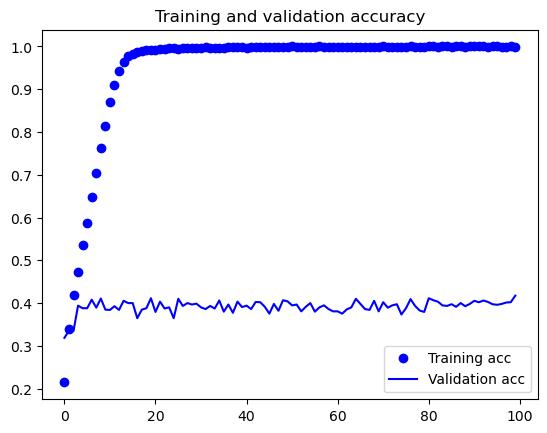

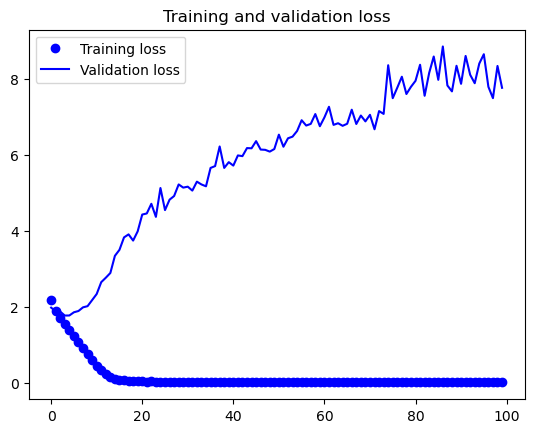

In [11]:
# Plot the Training and Validation Accuracy & Loss Scores
import matplotlib.pyplot as plt
%matplotlib inline

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

#### Model 1a Conclusion

In [12]:
# Conclusion for 1a
# Model begins to overfit around the 6-8 epoch
# Model 1a validation accuracy hovers around 40-41%
# Accuracy may be further improved by adding more layers, implementing regularization techniques, trying different activation
# functions, making use of data augmentation, testing the model with different learning rates, batch sizes and epochs.
# using lesser epochs may reduce unnecessary learning.

In [13]:
# Save Model 1a
model.save('food_model_1a.h5')

#### Model 1b (Increasing Layers)

In [22]:
# Build the Model (1b)
# Changes -> Added another Conv2D layer (256) and max pooling layers
# experimenting with increasing model complexity

# Model 1b
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_size, img_size, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(256, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(10, activation='softmax')) # 10 different foods

In [23]:
# Model Summary
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 74, 74, 32)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 17, 17, 128)     

In [24]:
# Train the Model

# Compile the model
# categorical_crossentropy
model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(learning_rate=1e-4), # base learning rate=1e-4
              metrics=['acc'])

# Data Pre-processing (batch_size = 30)
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        # All images will be resized to 150x150
        target_size=(img_size, img_size),
        batch_size=30,
        class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(img_size, img_size),
        batch_size=30,
        class_mode='categorical')


Found 7500 images belonging to 10 classes.
Found 2000 images belonging to 10 classes.


In [25]:
# Check generator shapes
for data_batch, labels_batch in train_generator:
    print('Data Batch Shape:', data_batch.shape)
    tmp_plot=data_batch[0]
    print('Labels Batch Shape:', labels_batch.shape)
    break

Data Batch Shape: (30, 150, 150, 3)
Labels Batch Shape: (30, 10)


In [26]:
# Fit the model
# 100 epoch (unchanged)
history = model.fit(
      train_generator,
      steps_per_epoch=250, #train_sample_size=7500/data_batch_size=30 (recalibrate)
      epochs=100, # increase epochs
      validation_data=validation_generator,
      validation_steps=50)

Epoch 1/100
250/250 [==============================] - 32s 124ms/step - loss: 2.1660 - acc: 0.1989 - val_loss: 2.0013 - val_acc: 0.2787
Epoch 2/100
250/250 [==============================] - 30s 121ms/step - loss: 1.9066 - acc: 0.3284 - val_loss: 1.8601 - val_acc: 0.3600
Epoch 3/100
250/250 [==============================] - 31s 124ms/step - loss: 1.7699 - acc: 0.3853 - val_loss: 1.7707 - val_acc: 0.3913
Epoch 4/100
250/250 [==============================] - 30s 122ms/step - loss: 1.6661 - acc: 0.4223 - val_loss: 1.7333 - val_acc: 0.4100
Epoch 5/100
250/250 [==============================] - 31s 123ms/step - loss: 1.5862 - acc: 0.4588 - val_loss: 1.6649 - val_acc: 0.4427
Epoch 6/100
250/250 [==============================] - 31s 123ms/step - loss: 1.5001 - acc: 0.4837 - val_loss: 1.6784 - val_acc: 0.4327
Epoch 7/100
250/250 [==============================] - 32s 126ms/step - loss: 1.4061 - acc: 0.5243 - val_loss: 1.5934 - val_acc: 0.4767
Epoch 8/100
250/250 [===========================

Epoch 61/100
250/250 [==============================] - 30s 120ms/step - loss: 0.0127 - acc: 0.9963 - val_loss: 6.4627 - val_acc: 0.4487
Epoch 62/100
250/250 [==============================] - 30s 120ms/step - loss: 0.0096 - acc: 0.9976 - val_loss: 6.8161 - val_acc: 0.4380
Epoch 63/100
250/250 [==============================] - 31s 123ms/step - loss: 0.0132 - acc: 0.9967 - val_loss: 7.6918 - val_acc: 0.3893
Epoch 64/100
250/250 [==============================] - 30s 121ms/step - loss: 0.0092 - acc: 0.9972 - val_loss: 6.5580 - val_acc: 0.4347
Epoch 65/100
250/250 [==============================] - 30s 121ms/step - loss: 0.0084 - acc: 0.9980 - val_loss: 6.9380 - val_acc: 0.4347
Epoch 66/100
250/250 [==============================] - 30s 120ms/step - loss: 0.0162 - acc: 0.9971 - val_loss: 6.7449 - val_acc: 0.4307
Epoch 67/100
250/250 [==============================] - 31s 122ms/step - loss: 0.0122 - acc: 0.9971 - val_loss: 7.3019 - val_acc: 0.4387
Epoch 68/100
250/250 [===================

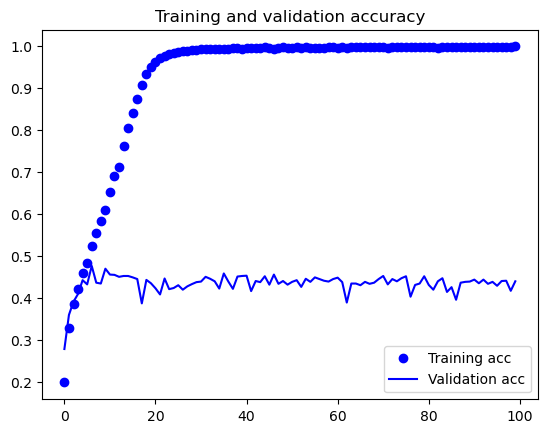

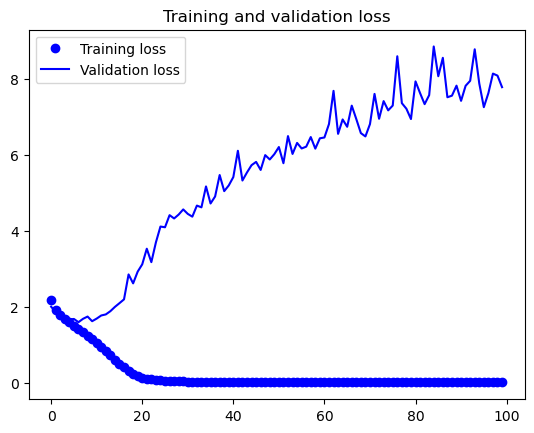

In [27]:
# Plot the Training and Validation Accuracy & Loss Scores
import matplotlib.pyplot as plt
%matplotlib inline

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

#### Model 1b Conclusion

In [28]:
# Conclusion for 1b
# Model begins to overfit later than 1a, around the 15-17 epoch
# Model 1b has a slight increase in validation accuracy at 44-46%. Increase in accuracy is insufficient.
# Model accuracy can be further improved by adjusting batch sizes and epochs

In [29]:
# Save Model 1b
model.save('food_model_1b.h5')

#### Model 1c (Modifying Epochs & Batch Size)

In [66]:
# Build the Model (1c)
# Kept -> Added another Conv2D layer (256) and max pooling layer
# Changes -> adjusting batch size and epochs
# experimenting with increasing model complexity

# Model 1c
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_size, img_size, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(256, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(10, activation='softmax')) # 10 different foods

In [67]:
# Model Summary
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_39 (Conv2D)          (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_39 (MaxPoolin  (None, 74, 74, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_40 (Conv2D)          (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_40 (MaxPoolin  (None, 36, 36, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_41 (Conv2D)          (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_41 (MaxPoolin  (None, 17, 17, 128)    

In [68]:
# Train the Model

# Compile the model
# categorical_crossentropy
model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(learning_rate=1e-4), # base learning rate=1e-4
              metrics=['acc'])

# Data Pre-processing (batch_size = 20)
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        # All images will be resized to 150x150
        target_size=(img_size, img_size),
        batch_size=20,
        class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(img_size, img_size),
        batch_size=30,
        class_mode='categorical')


Found 7500 images belonging to 10 classes.
Found 2000 images belonging to 10 classes.


In [69]:
# Check generator shapes
for data_batch, labels_batch in train_generator:
    print('Data Batch Shape:', data_batch.shape)
    tmp_plot=data_batch[0]
    print('Labels Batch Shape:', labels_batch.shape)
    break

Data Batch Shape: (20, 150, 150, 3)
Labels Batch Shape: (20, 10)


In [70]:
# Fit the model
# 50 epoch (reduce)
history = model.fit(
      train_generator,
      steps_per_epoch=375, #train_sample_size=7500/data_batch_size=20 (recalibrate)
      epochs=50, # reduce epoch
      validation_data=validation_generator,
      validation_steps=50) #validation_sample_size=2500/data_batch_size=30

Epoch 1/50
375/375 [==============================] - 32s 82ms/step - loss: 2.1642 - acc: 0.2065 - val_loss: 2.0139 - val_acc: 0.2767
Epoch 2/50
375/375 [==============================] - 31s 81ms/step - loss: 1.8953 - acc: 0.3328 - val_loss: 1.8453 - val_acc: 0.3580
Epoch 3/50
375/375 [==============================] - 31s 81ms/step - loss: 1.7435 - acc: 0.3960 - val_loss: 1.7914 - val_acc: 0.3653
Epoch 4/50
375/375 [==============================] - 31s 82ms/step - loss: 1.6366 - acc: 0.4384 - val_loss: 1.7080 - val_acc: 0.4133
Epoch 5/50
375/375 [==============================] - 33s 87ms/step - loss: 1.5308 - acc: 0.4712 - val_loss: 1.6879 - val_acc: 0.4340
Epoch 6/50
375/375 [==============================] - 33s 88ms/step - loss: 1.4240 - acc: 0.5148 - val_loss: 1.6107 - val_acc: 0.4620
Epoch 7/50
375/375 [==============================] - 32s 84ms/step - loss: 1.3142 - acc: 0.5501 - val_loss: 1.6287 - val_acc: 0.4640
Epoch 8/50
375/375 [==============================] - 30s 81ms

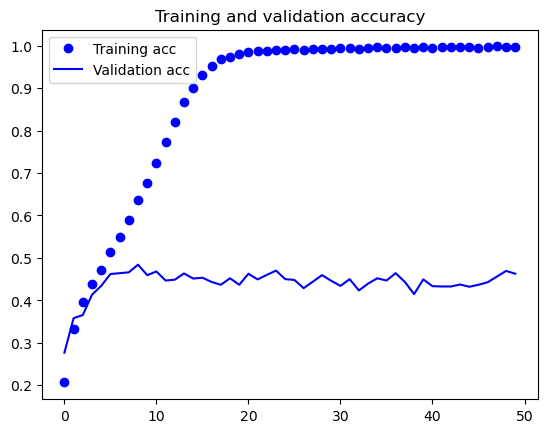

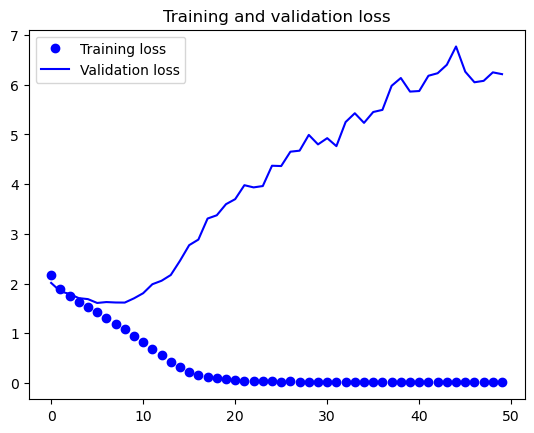

In [71]:
# Plot the Training and Validation Accuracy & Loss Scores
import matplotlib.pyplot as plt
%matplotlib inline

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

#### Model 1c Conclusion

In [72]:
# Conclusion for 1c 
# Model 1c begins to overfit earlier than previous models. From the graph, overfit seems to begin at around the 7-8 epoch.
# Validation accuracy of the model does not seem to show any signs of improvement. Accuracy stagnated at 45%-46%.
# Adjusting the base model parameters does not seem to have a large impact on the model performance. 
# Test next model with a different optimizer 'RMSprop' to 'adam' .
# Data Augmentation and Regularization techniques may have to be implemented to further improve the accuracy of the model. 

In [73]:
# Save Model 1c
model.save('food_model_1c.h5')

#### Model 1d (Adam Optimizer)

In [82]:
# Build the Model (1d)
# Kept 
# -> Added another Conv2D layer (256) and max pooling layer
# -> adjusting batch size and epochs (batch size = 20, steps per epoch = 375, epcoh = 50)
# Changes -> change optimizer RMSprop to Adam
# experimenting with increasing model complexity

# Model 1d
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_size, img_size, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(256, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(10, activation='softmax')) # 10 different foods

In [83]:
# Model Summary
model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_47 (Conv2D)          (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_47 (MaxPoolin  (None, 74, 74, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_48 (Conv2D)          (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_48 (MaxPoolin  (None, 36, 36, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_49 (Conv2D)          (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_49 (MaxPoolin  (None, 17, 17, 128)    

In [84]:
# Train the Model

# Compile the model
# categorical_crossentropy
model.compile(loss='categorical_crossentropy',
              optimizer= 'adam',
              metrics=['acc'])

# Data Pre-processing (batch_size = 20)
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        # All images will be resized to 150x150
        target_size=(img_size, img_size),
        batch_size=20,
        class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(img_size, img_size),
        batch_size=20,
        class_mode='categorical')

Found 7500 images belonging to 10 classes.
Found 2000 images belonging to 10 classes.


In [85]:
# Check generator shapes
for data_batch, labels_batch in train_generator:
    print('Data Batch Shape:', data_batch.shape)
    tmp_plot=data_batch[0]
    print('Labels Batch Shape:', labels_batch.shape)
    break

Data Batch Shape: (20, 150, 150, 3)
Labels Batch Shape: (20, 10)


In [86]:
# Fit the model
# 50 epoch (reduce)
history = model.fit(
      train_generator,
      steps_per_epoch=375, #train_sample_size=7500/data_batch_size=20 (recalibrate)
      epochs=50, # reduce epoch
      validation_data=validation_generator,
      validation_steps=50) #validation_sample_size=2500/data_batch_size=30

Epoch 1/50
375/375 [==============================] - 37s 97ms/step - loss: 2.2854 - acc: 0.1283 - val_loss: 2.2724 - val_acc: 0.1330
Epoch 2/50
375/375 [==============================] - 36s 95ms/step - loss: 2.1052 - acc: 0.2303 - val_loss: 2.0227 - val_acc: 0.2800
Epoch 3/50
375/375 [==============================] - 30s 81ms/step - loss: 1.8976 - acc: 0.3155 - val_loss: 1.8464 - val_acc: 0.3570
Epoch 4/50
375/375 [==============================] - 30s 79ms/step - loss: 1.7280 - acc: 0.3848 - val_loss: 1.7723 - val_acc: 0.3930
Epoch 5/50
375/375 [==============================] - 30s 79ms/step - loss: 1.5758 - acc: 0.4443 - val_loss: 1.6739 - val_acc: 0.4170
Epoch 6/50
375/375 [==============================] - 31s 81ms/step - loss: 1.3908 - acc: 0.5097 - val_loss: 1.7885 - val_acc: 0.4140
Epoch 7/50
375/375 [==============================] - 31s 81ms/step - loss: 1.1378 - acc: 0.6080 - val_loss: 1.7771 - val_acc: 0.4460
Epoch 8/50
375/375 [==============================] - 31s 82ms

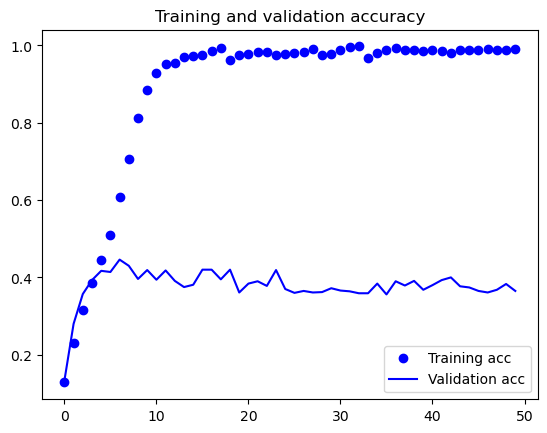

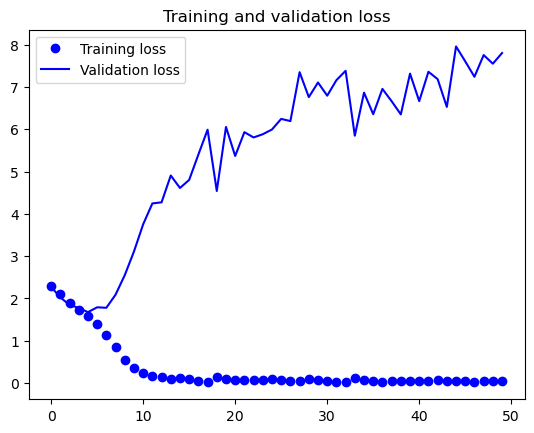

In [87]:
# Plot the Training and Validation Accuracy & Loss Scores
import matplotlib.pyplot as plt
%matplotlib inline

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

#### Model 1d Conclusion

In [88]:
# Conclusion for 1d 
# Similar to the previous model (1c), model 1d begins to overfit earlier than previous models (1a-1b).
# From the graph, overfit seems to begin at around the 6-7 epoch.
# Validation accuracy of the model (1d) has decreased considerably. Validation accuracy of the model is at 36%-38%. 
# However, this optimizer has only been tested on one instance of the model and the decrease in accuracy may not hold true when testing with models that hove implemented data augmentation and regularization.
# Again, it seems that adjusting the base model parameters does not seem to have a large impact on the model performance. 
# To see further improvements in the accuracy of the model, Data Augmentation and Regularization techniques may have to be implemented to further improve the accuracy of the model.
# Data Augmentation in particular has to be tested as it effectively adds more data to the model, allowing it to perform better as it will have more data to learn and understand from data.

In [89]:
# Save Model 1d
model.save('food_model_1d.h5')

#### Model 1e (Data Augmentation)

In [34]:
# # Build the Model (1e)
# Kept 
# -> Added another Conv2D layer (256) and max pooling layer
# -> adjusting batch size and epochs (batch size = 20, steps per epoch = 375)
# -> change optimizer RMSprop to Adam
# Changes -> Data Augmentation to add more data + increased epoch due to higher data (epoch = 150)
# experimenting with increasing data for better accuracy 

# Model 1e (same model)
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_size, img_size, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(256, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(10, activation='softmax')) # 10 different foods

In [35]:
# Data Augmentation
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

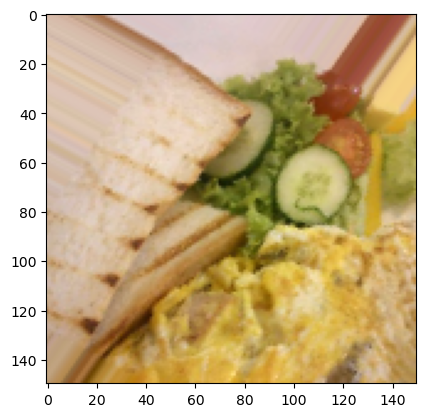

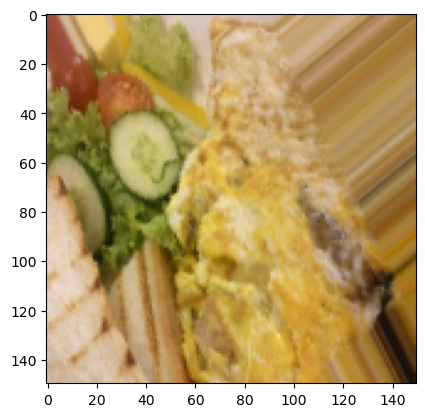

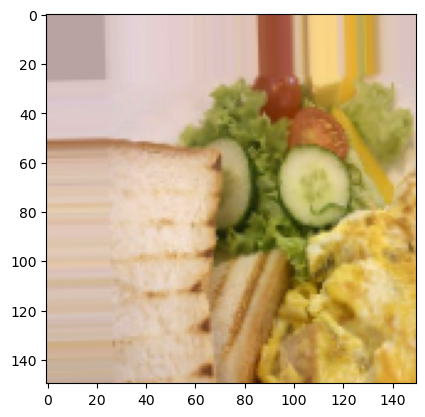

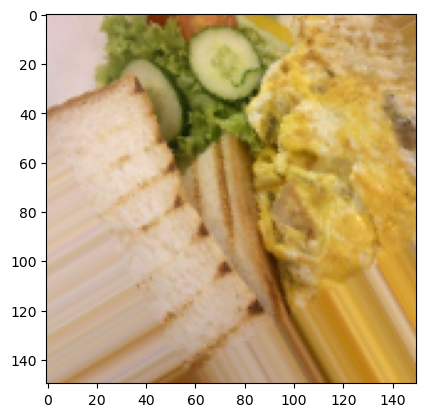

In [36]:
# Viewing Augmented Image (1e only)
import os
import matplotlib.pyplot as plt

from tensorflow.keras.preprocessing import image
train_omelette_dir = os.path.join(base_dir, 'train/omelette')

fnames = [os.path.join(train_omelette_dir, fname) for fname in os.listdir(train_omelette_dir)]

# We pick one image to "augment"
img_path = fnames[3]

# Read the image and resize it
img = image.load_img(img_path, target_size=(img_size, img_size))

# Convert it to a Numpy array with shape (150, 150, 3)
x = image.img_to_array(img)

# Reshape it to (1, 150, 150, 3)
x = x.reshape((1,) + x.shape)

# The .flow() command below generates batches of randomly transformed images.
# It will loop indefinitely, so we need to `break` the loop at some point!
i = 0
for batch in train_datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break
        

plt.show()

In [37]:
# Train the Model

# Compile the model
# categorical_crossentropy
model.compile(loss='categorical_crossentropy',
              optimizer= 'adam',
              metrics=['acc'])

# Data Pre-processing
# Train already rescaled
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        # All images will be resized to 150x150
        target_size=(img_size, img_size),
        batch_size=20,
        class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(img_size, img_size),
        batch_size=20,
        class_mode='categorical')

Found 7500 images belonging to 10 classes.
Found 2000 images belonging to 10 classes.


In [38]:
# Check generator shapes
for data_batch, labels_batch in train_generator:
    print('Data Batch Shape:', data_batch.shape)
    tmp_plot=data_batch[0]
    print('Labels Batch Shape:', labels_batch.shape)
    break

Data Batch Shape: (20, 150, 150, 3)
Labels Batch Shape: (20, 10)


In [39]:
# Fit the model
# 150 epoch (increase)
history = model.fit(
      train_generator,
      steps_per_epoch=375, #train_sample_size=7500/data_batch_size=20 (recalibrate)
      epochs=150, # increase epoch due to more data
      validation_data=validation_generator,
      validation_steps=50) #validation_sample_size=2500/data_batch_size=30

Epoch 1/150
375/375 [==============================] - 56s 147ms/step - loss: 2.2776 - acc: 0.1267 - val_loss: 2.1607 - val_acc: 0.2060
Epoch 2/150
375/375 [==============================] - 56s 148ms/step - loss: 2.1237 - acc: 0.2248 - val_loss: 2.0282 - val_acc: 0.2650
Epoch 3/150
375/375 [==============================] - 55s 146ms/step - loss: 2.0105 - acc: 0.2632 - val_loss: 1.9356 - val_acc: 0.3090
Epoch 4/150
375/375 [==============================] - 56s 149ms/step - loss: 1.9291 - acc: 0.2880 - val_loss: 1.8720 - val_acc: 0.3250
Epoch 5/150
375/375 [==============================] - 56s 148ms/step - loss: 1.8568 - acc: 0.3332 - val_loss: 1.8381 - val_acc: 0.3310
Epoch 6/150
375/375 [==============================] - 57s 151ms/step - loss: 1.7927 - acc: 0.3600 - val_loss: 1.8188 - val_acc: 0.3540
Epoch 7/150
375/375 [==============================] - 55s 146ms/step - loss: 1.7558 - acc: 0.3668 - val_loss: 1.9120 - val_acc: 0.3600
Epoch 8/150
375/375 [===========================

Epoch 61/150
375/375 [==============================] - 55s 146ms/step - loss: 0.8927 - acc: 0.6936 - val_loss: 1.1591 - val_acc: 0.6320
Epoch 62/150
375/375 [==============================] - 55s 147ms/step - loss: 0.8908 - acc: 0.6848 - val_loss: 1.2591 - val_acc: 0.6110
Epoch 63/150
375/375 [==============================] - 55s 146ms/step - loss: 0.8891 - acc: 0.6933 - val_loss: 1.2143 - val_acc: 0.6230
Epoch 64/150
375/375 [==============================] - 56s 149ms/step - loss: 0.8838 - acc: 0.6900 - val_loss: 1.3084 - val_acc: 0.6000
Epoch 65/150
375/375 [==============================] - 55s 146ms/step - loss: 0.8678 - acc: 0.7039 - val_loss: 1.1902 - val_acc: 0.6270
Epoch 66/150
375/375 [==============================] - 56s 150ms/step - loss: 0.8419 - acc: 0.7087 - val_loss: 1.2524 - val_acc: 0.6230
Epoch 67/150
375/375 [==============================] - 56s 150ms/step - loss: 0.8623 - acc: 0.6981 - val_loss: 1.2008 - val_acc: 0.6290
Epoch 68/150
375/375 [===================

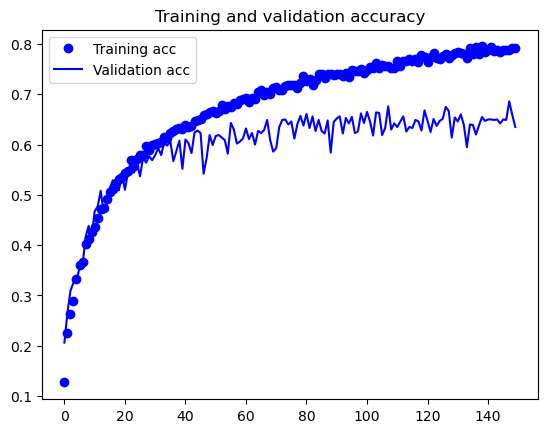

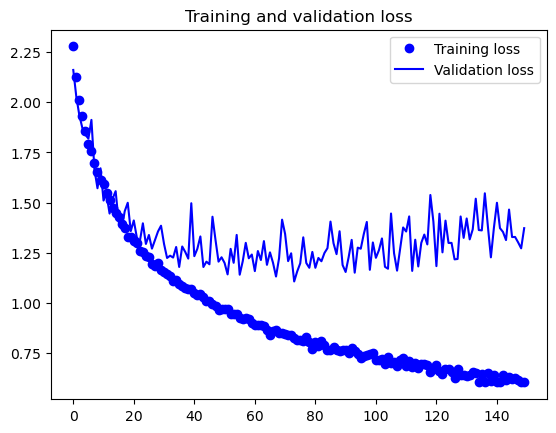

In [40]:
# Plot the Training and Validation Accuracy & Loss Scores
import matplotlib.pyplot as plt
%matplotlib inline

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

#### Model 1e Conclusion

In [41]:
# Conclusion for 1e
# From the validation curves, the model begins to overfit around the 110-115 epoch.
# By applying implementing data augmentation to model, we are able to increase the accuracy of the model by a considerable amount, from 36%- 38% to 62%. 
# This can be attributed to the higher amount of data used to train the model in model 1e obtained from data augmentation.
# However, when observing the validation curves, it seems that the training accuracy did not reach 95% and above and has stagnated at around 62%. 
# The model does not seem to be overfitting as well despite increasing the number of epochs in anticipation of the additional data.
# This may be a sign that the model isn’t complex enough. 
# Thus, the next iteration of the model will focus on increasing the complexity by adding more layers or testing regularization and dropout methods.

In [42]:
# Save Model 1e
model.save('food_model_1e.h5')

#### Model 1f (Dropout & Regularization) (Adam Optimizer)

In [27]:
# # Build the Model (1f) ADAM Ver
# Kept 
# -> Added another Conv2D layer (256) and max pooling layer
# -> adjusting batch size and epochs (batch size = 20, steps per epoch = 375, epcoh = 150)
# -> change optimizer RMSprop to Adam
# -> Data Augmentation to add more data + increased epoch due to higher data (epoch = 150)
# Changes -> add l2 regularization (0.001) + adding a dropout layer (0.5)
# optimising model parameters 

# for regularizers
from tensorflow.keras import regularizers

# Model 1f
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_size, img_size, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(256, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(10, activation='softmax')) # 10 different foods

In [28]:
# Data Augmentation
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

In [29]:
# Train the Model

# Compile the model
# categorical_crossentropy
model.compile(loss='categorical_crossentropy',
              optimizer= 'adam',
              metrics=['acc'])

# Data Pre-processing
# Train already rescaled
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        # All images will be resized to 150x150
        target_size=(img_size, img_size),
        batch_size=20,
        class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(img_size, img_size),
        batch_size=20,
        class_mode='categorical')

Found 7500 images belonging to 10 classes.
Found 2000 images belonging to 10 classes.


In [30]:
# Check generator shapes
for data_batch, labels_batch in train_generator:
    print('Data Batch Shape:', data_batch.shape)
    tmp_plot=data_batch[0]
    print('Labels Batch Shape:', labels_batch.shape)
    break

Data Batch Shape: (20, 150, 150, 3)
Labels Batch Shape: (20, 10)


In [31]:
# Fit the model
# 150 epoch
history = model.fit(
      train_generator,
      steps_per_epoch=375, #train_sample_size=7500/data_batch_size=20 (recalibrated)
      epochs=150, # increase epoch due to more data
      validation_data=validation_generator,
      validation_steps=50) 

Epoch 1/150
375/375 [==============================] - 63s 164ms/step - loss: 2.3065 - acc: 0.1277 - val_loss: 2.2016 - val_acc: 0.1960
Epoch 2/150
375/375 [==============================] - 59s 158ms/step - loss: 2.1483 - acc: 0.2096 - val_loss: 2.0546 - val_acc: 0.2440
Epoch 3/150
375/375 [==============================] - 64s 171ms/step - loss: 2.0525 - acc: 0.2475 - val_loss: 1.9293 - val_acc: 0.3130
Epoch 4/150
375/375 [==============================] - 62s 165ms/step - loss: 2.0029 - acc: 0.2615 - val_loss: 1.9831 - val_acc: 0.2760
Epoch 5/150
375/375 [==============================] - 57s 151ms/step - loss: 1.9498 - acc: 0.2892 - val_loss: 1.9139 - val_acc: 0.3290
Epoch 6/150
375/375 [==============================] - 62s 166ms/step - loss: 1.8954 - acc: 0.3091 - val_loss: 1.7595 - val_acc: 0.3730
Epoch 7/150
375/375 [==============================] - 62s 165ms/step - loss: 1.8238 - acc: 0.3417 - val_loss: 1.7389 - val_acc: 0.3740
Epoch 8/150
375/375 [===========================

Epoch 61/150
375/375 [==============================] - 58s 153ms/step - loss: 1.1426 - acc: 0.6144 - val_loss: 1.3284 - val_acc: 0.5640
Epoch 62/150
375/375 [==============================] - 56s 150ms/step - loss: 1.1271 - acc: 0.6197 - val_loss: 1.1770 - val_acc: 0.6060
Epoch 63/150
375/375 [==============================] - 57s 151ms/step - loss: 1.1447 - acc: 0.6153 - val_loss: 1.1698 - val_acc: 0.6300
Epoch 64/150
375/375 [==============================] - 57s 151ms/step - loss: 1.1260 - acc: 0.6244 - val_loss: 1.2441 - val_acc: 0.5980
Epoch 65/150
375/375 [==============================] - 57s 151ms/step - loss: 1.1046 - acc: 0.6275 - val_loss: 1.2542 - val_acc: 0.5960
Epoch 66/150
375/375 [==============================] - 58s 155ms/step - loss: 1.1270 - acc: 0.6269 - val_loss: 1.1969 - val_acc: 0.6230
Epoch 67/150
375/375 [==============================] - 59s 157ms/step - loss: 1.1130 - acc: 0.6169 - val_loss: 1.2143 - val_acc: 0.5980
Epoch 68/150
375/375 [===================

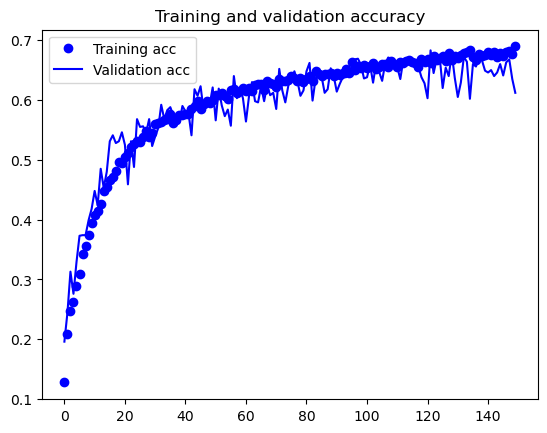

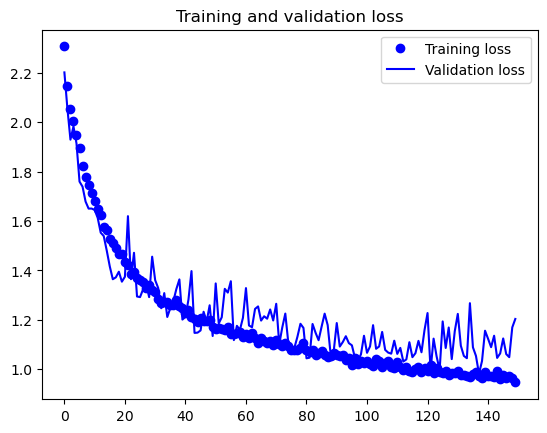

In [32]:
# Plot the Training and Validation Accuracy & Loss Scores
import matplotlib.pyplot as plt
%matplotlib inline

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

#### Model 1f Conclusion

In [ ]:
# Conclusion for 1f
# By adding dropout layers and regularization, the overfitting present in the previous model (1e) has been eliminated from the model.
# Using regularization and dropout has reduced the complexity of the model, thus reducing overfitting. 
# However, the accuracy of the model seems to be unchanged from the previous model (1e), as the accuracy seems to increase and stagnate around 65%. 
# The next iteration of the model will test the same model with a different optimizer to determine which optimizer will be used for subsequent models.
# However, model 1f appears to have the highest accuracy with minimal overfitting among the models in model 1.

In [18]:
# Save Model 1f
model.save('food_model_1f.h5')

#### Model 1g (Dropout & Regularization) (RMSprop Optimizer)

In [33]:
# # Build the Model (1g) RMSprop Ver
# Kept 
# -> Added another Conv2D layer (256) and max pooling layer
# -> adjusting batch size and epochs (batch size = 20, steps per epoch = 375, epcoh = 150)
# -> change optimizer RMSprop to Adam
# -> Data Augmentation to add more data + increased epoch due to higher data (epoch = 150)
# Changes -> add l2 regularization (0.001) + adding a dropout layer (0.5) + Use RMSProp Optimizer (0.00001)
# optimising model parameters 

# for regularizers
from tensorflow.keras import regularizers

# Model 1g
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_size, img_size, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(256, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(10, activation='softmax')) # 10 different foods

In [34]:
# Model Summary
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 74, 74, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_17 (Conv2D)          (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 36, 36, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_18 (Conv2D)          (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 17, 17, 128)     

In [ ]:
# Data Augmentation
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

In [35]:
# Train the Model

# Compile the model
# categorical_crossentropy
model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(learning_rate=1e-5),
              metrics=['acc'])

# Data Pre-processing
# Train already rescaled
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        # All images will be resized to 150x150
        target_size=(img_size, img_size),
        batch_size=20,
        class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(img_size, img_size),
        batch_size=20,
        class_mode='categorical')

Found 7500 images belonging to 10 classes.
Found 2000 images belonging to 10 classes.


In [36]:
# Check generator shapes
for data_batch, labels_batch in train_generator:
    print('Data Batch Shape:', data_batch.shape)
    tmp_plot=data_batch[0]
    print('Labels Batch Shape:', labels_batch.shape)
    break

Data Batch Shape: (20, 150, 150, 3)
Labels Batch Shape: (20, 10)


In [37]:
# Fit the model
# 150 epoch
history = model.fit(
      train_generator,
      steps_per_epoch=375, #train_sample_size=7500/data_batch_size=20 (recalibrated)
      epochs=150, # increase epoch due to more data
      validation_data=validation_generator,
      validation_steps=50) 

Epoch 1/150
375/375 [==============================] - 58s 151ms/step - loss: 2.4605 - acc: 0.1113 - val_loss: 2.4413 - val_acc: 0.1090
Epoch 2/150
375/375 [==============================] - 56s 150ms/step - loss: 2.4266 - acc: 0.1443 - val_loss: 2.3876 - val_acc: 0.1940
Epoch 3/150
375/375 [==============================] - 57s 153ms/step - loss: 2.3816 - acc: 0.1792 - val_loss: 2.3262 - val_acc: 0.2020
Epoch 4/150
375/375 [==============================] - 56s 149ms/step - loss: 2.3363 - acc: 0.2060 - val_loss: 2.2657 - val_acc: 0.2330
Epoch 5/150
375/375 [==============================] - 58s 153ms/step - loss: 2.2932 - acc: 0.2271 - val_loss: 2.2309 - val_acc: 0.2470
Epoch 6/150
375/375 [==============================] - 56s 149ms/step - loss: 2.2597 - acc: 0.2333 - val_loss: 2.2012 - val_acc: 0.2320
Epoch 7/150
375/375 [==============================] - 57s 153ms/step - loss: 2.2305 - acc: 0.2445 - val_loss: 2.1662 - val_acc: 0.2790
Epoch 8/150
375/375 [===========================

Epoch 61/150
375/375 [==============================] - 56s 149ms/step - loss: 1.7708 - acc: 0.4168 - val_loss: 1.7771 - val_acc: 0.4220
Epoch 62/150
375/375 [==============================] - 55s 147ms/step - loss: 1.7745 - acc: 0.4192 - val_loss: 1.7765 - val_acc: 0.4410
Epoch 63/150
375/375 [==============================] - 56s 149ms/step - loss: 1.7595 - acc: 0.4212 - val_loss: 1.7884 - val_acc: 0.4410
Epoch 64/150
375/375 [==============================] - 56s 149ms/step - loss: 1.7521 - acc: 0.4317 - val_loss: 1.7307 - val_acc: 0.4520
Epoch 65/150
375/375 [==============================] - 57s 151ms/step - loss: 1.7511 - acc: 0.4257 - val_loss: 1.7293 - val_acc: 0.4650
Epoch 66/150
375/375 [==============================] - 55s 148ms/step - loss: 1.7479 - acc: 0.4329 - val_loss: 1.8620 - val_acc: 0.3950
Epoch 67/150
375/375 [==============================] - 56s 149ms/step - loss: 1.7460 - acc: 0.4255 - val_loss: 1.7883 - val_acc: 0.4230
Epoch 68/150
375/375 [===================

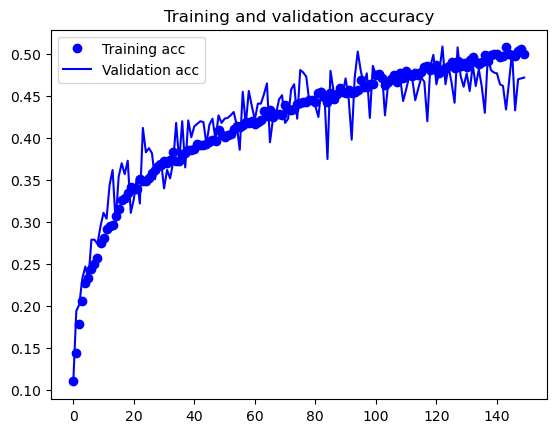

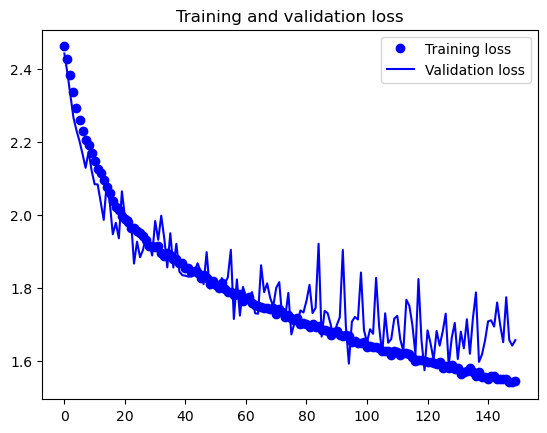

In [38]:
# Plot the Training and Validation Accuracy & Loss Scores
import matplotlib.pyplot as plt
%matplotlib inline

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

#### Model 1g Conclusion

In [ ]:
# Conclusion for 1g
# When building and testing the model with a different optimizer, the overfitting present in the validation curves is identical to the previous iteration (1f).
# This proves that using regularization and dropout will reduce overfitting in the model. However, the validation accuracy of the model has decreased significantly.
# The accuracy has dropped from around 65% to around 49%. This is a significant drop in accuracy and the cause can be attributed to the optimizer used as it was the only change made from the previous iteration. 
# This shows that the most suitable optimizer for this model is the “Adam” optimizer.
# This the final iteration of model 1 tested. Subsequent models will feature the use of pre-trained conv to further improve accuracy.

In [ ]:
# Save Model 1g
model.save('food_model_1g.h5')

### Model #2

#### Model 2a (VGG16 with Frozen Layers)

In [24]:
# Build the Model 2a
# note: Re-build the base model
# Import Pre-Trained Conv (VGG16)
# test With Reduced Steps per Epoch (300) and fewer epochs (to reduce computation time)
from tensorflow.keras.applications import VGG16

conv_base = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(img_size, img_size, 3))

# Model 2a
model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

# Summary
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten_2 (Flatten)         (None, 8192)              0         
                                                                 
 dense_4 (Dense)             (None, 256)               2097408   
                                                                 
 dense_5 (Dense)             (None, 10)                2570      
                                                                 
Total params: 16,814,666
Trainable params: 16,814,666
Non-trainable params: 0
_________________________________________________________________


In [25]:
# Freeze the Pre-Trained Layer
conv_base.trainable = False
# Summary
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten_2 (Flatten)         (None, 8192)              0         
                                                                 
 dense_4 (Dense)             (None, 256)               2097408   
                                                                 
 dense_5 (Dense)             (None, 10)                2570      
                                                                 
Total params: 16,814,666
Trainable params: 2,099,978
Non-trainable params: 14,714,688
_________________________________________________________________


In [26]:
# Data Augmentation
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

In [11]:
# Train the Model

# Compile the model
# categorical_crossentropy
model.compile(loss='categorical_crossentropy',
              optimizer= 'adam',
              metrics=['acc'])

# Data Pre-processing
# Train already rescaled
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        # All images will be resized to 150x150
        target_size=(img_size, img_size),
        batch_size=20,
        class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(img_size, img_size),
        batch_size=20,
        class_mode='categorical')

Found 7500 images belonging to 10 classes.
Found 2000 images belonging to 10 classes.


In [12]:
# Check generator shapes
for data_batch, labels_batch in train_generator:
    print('Data Batch Shape:', data_batch.shape)
    tmp_plot=data_batch[0]
    print('Labels Batch Shape:', labels_batch.shape)
    break

Data Batch Shape: (20, 150, 150, 3)
Labels Batch Shape: (20, 10)


In [13]:
# Fit the model
# 100 epoch
history = model.fit(
      train_generator,
      steps_per_epoch=300, #train_sample_size=7500/data_batch_size=20 (recalibrated)
      epochs=100, # reduce
      validation_data=validation_generator,
      validation_steps=50) 

Epoch 1/100
300/300 [==============================] - 61s 163ms/step - loss: 1.7920 - acc: 0.3883 - val_loss: 1.2916 - val_acc: 0.5740
Epoch 2/100
300/300 [==============================] - 46s 152ms/step - loss: 1.4749 - acc: 0.4912 - val_loss: 1.2987 - val_acc: 0.5580
Epoch 3/100
300/300 [==============================] - 45s 152ms/step - loss: 1.3903 - acc: 0.5260 - val_loss: 1.2486 - val_acc: 0.5740
Epoch 4/100
300/300 [==============================] - 45s 149ms/step - loss: 1.3205 - acc: 0.5453 - val_loss: 1.2484 - val_acc: 0.5750
Epoch 5/100
300/300 [==============================] - 45s 150ms/step - loss: 1.2960 - acc: 0.5567 - val_loss: 1.1557 - val_acc: 0.6110
Epoch 6/100
300/300 [==============================] - 45s 149ms/step - loss: 1.2553 - acc: 0.5660 - val_loss: 1.2451 - val_acc: 0.5700
Epoch 7/100
300/300 [==============================] - 45s 149ms/step - loss: 1.2224 - acc: 0.5883 - val_loss: 1.2067 - val_acc: 0.5960
Epoch 8/100
300/300 [===========================

Epoch 61/100
300/300 [==============================] - 47s 155ms/step - loss: 0.8623 - acc: 0.6988 - val_loss: 1.1851 - val_acc: 0.6440
Epoch 62/100
300/300 [==============================] - 45s 151ms/step - loss: 0.8633 - acc: 0.7033 - val_loss: 1.1551 - val_acc: 0.6420
Epoch 63/100
300/300 [==============================] - 49s 164ms/step - loss: 0.8600 - acc: 0.6990 - val_loss: 1.0459 - val_acc: 0.6610
Epoch 64/100
300/300 [==============================] - 45s 149ms/step - loss: 0.8359 - acc: 0.7030 - val_loss: 1.2441 - val_acc: 0.6350
Epoch 65/100
300/300 [==============================] - 46s 153ms/step - loss: 0.8280 - acc: 0.7142 - val_loss: 1.1360 - val_acc: 0.6530
Epoch 66/100
300/300 [==============================] - 45s 149ms/step - loss: 0.8552 - acc: 0.7070 - val_loss: 1.1664 - val_acc: 0.6350
Epoch 67/100
300/300 [==============================] - 47s 157ms/step - loss: 0.8262 - acc: 0.7160 - val_loss: 1.1517 - val_acc: 0.6410
Epoch 68/100
300/300 [===================

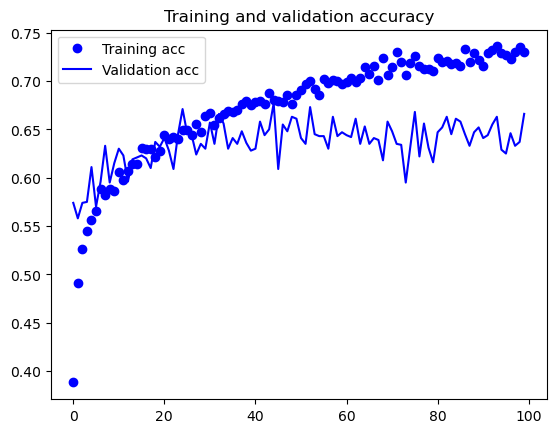

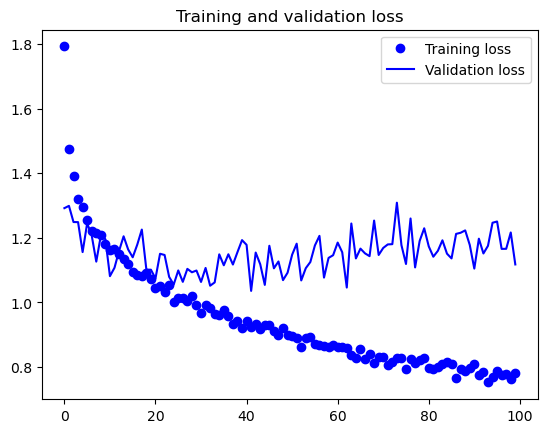

In [14]:
# Plot the Training and Validation Accuracy & Loss Scores
import matplotlib.pyplot as plt
%matplotlib inline

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

#### Model 2a Conclusion

In [15]:
# Conclusion for 2a
# The model 2a was tested with the pre-trained CNN VGG16, which stands for Visual Geometry Group. 
# The model was tested with similar parameters as before, with a simple flatten and dense layer of 256 neurons using the softmax function as the final layer and “Adam” as the optimizer. 
# The VGG16 layer was frozen to prevent any changes to the weights of the model to observe the changes when we unfreeze the layer.
# One change that was made was to reduce the epochs (150 > 100) as it had been observed that overfitting typically does not begin later than 80 to 90 epochs.
# The steps per epochs was reduced to 375 to reduce computation time.
# Data augmentation was also kept, as increasing the amount of data with data augmentation has proved to help increase the validation accuracy greatly based on previous testing on model 1. 
# From the validation curves of the model, it appears the model begins to overfit on the data around the 60th epoch. 
# The accuracy obtained from the model was similar to our final iteration for model 1 (f), staying around the 65% mark.
# To improve the accuracy further, unfreezing the layers may allow the model to learn some of the weights for our data, which may allow it to classify the images better.


In [16]:
# Save the Model
model.save('food_model_2a.h5')

#### Model 2b (VGG16 with Unfrozen Layers)

In [27]:
# Build the Model 2b
# note: Re-build the base model
# Import Pre-Trained Conv (VGG16)
# Unfreeze the conv_base layer
from tensorflow.keras.applications import VGG16

conv_base = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(img_size, img_size, 3))

# Model 2b
model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

# Summary
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten_3 (Flatten)         (None, 8192)              0         
                                                                 
 dense_6 (Dense)             (None, 256)               2097408   
                                                                 
 dense_7 (Dense)             (None, 10)                2570      
                                                                 
Total params: 16,814,666
Trainable params: 16,814,666
Non-trainable params: 0
_________________________________________________________________


In [28]:
# UnFreeze the Pre-Trained Layer
conv_base.trainable = True

set_trainable = False
for layer in conv_base.layers:
    if layer.name == 'block5_conv1':
        set_trainable = True # after black5_conv1, set_trainable becomes True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False
             
# Summary
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten_3 (Flatten)         (None, 8192)              0         
                                                                 
 dense_6 (Dense)             (None, 256)               2097408   
                                                                 
 dense_7 (Dense)             (None, 10)                2570      
                                                                 
Total params: 16,814,666
Trainable params: 9,179,402
Non-trainable params: 7,635,264
_________________________________________________________________


In [29]:
# Data Augmentation
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

In [30]:
# Train the Model

# Compile the model
# categorical_crossentropy
model.compile(loss='categorical_crossentropy',
              optimizer= 'adam',
              metrics=['acc'])

# Data Pre-processing
# Train already rescaled
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        # All images will be resized to 150x150
        target_size=(img_size, img_size),
        batch_size=20,
        class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(img_size, img_size),
        batch_size=20,
        class_mode='categorical')

Found 7500 images belonging to 10 classes.
Found 2000 images belonging to 10 classes.


In [31]:
# Check generator shapes
for data_batch, labels_batch in train_generator:
    print('Data Batch Shape:', data_batch.shape)
    tmp_plot=data_batch[0]
    print('Labels Batch Shape:', labels_batch.shape)
    break

Data Batch Shape: (20, 150, 150, 3)
Labels Batch Shape: (20, 10)


In [32]:
# Fit the model
# 100 epoch
history = model.fit(
      train_generator,
      steps_per_epoch=300, #train_sample_size=7500/data_batch_size=20 (recalibrated)
      epochs=100, # reduce
      validation_data=validation_generator,
      validation_steps=50) 

Epoch 1/100
300/300 [==============================] - 47s 153ms/step - loss: 2.3282 - acc: 0.1017 - val_loss: 2.3020 - val_acc: 0.0990
Epoch 2/100
300/300 [==============================] - 46s 152ms/step - loss: 2.3029 - acc: 0.0998 - val_loss: 2.3026 - val_acc: 0.0960
Epoch 3/100
300/300 [==============================] - 45s 151ms/step - loss: 2.3028 - acc: 0.1000 - val_loss: 2.3025 - val_acc: 0.0960
Epoch 4/100
300/300 [==============================] - 46s 152ms/step - loss: 2.3029 - acc: 0.0943 - val_loss: 2.3023 - val_acc: 0.1060
Epoch 5/100
300/300 [==============================] - 45s 150ms/step - loss: 2.3028 - acc: 0.0952 - val_loss: 2.3028 - val_acc: 0.0980
Epoch 6/100
300/300 [==============================] - 46s 152ms/step - loss: 2.3029 - acc: 0.0965 - val_loss: 2.3026 - val_acc: 0.1010
Epoch 7/100
300/300 [==============================] - 46s 154ms/step - loss: 2.3028 - acc: 0.0992 - val_loss: 2.3025 - val_acc: 0.1030
Epoch 8/100
300/300 [===========================

Epoch 61/100
300/300 [==============================] - 49s 163ms/step - loss: 2.3028 - acc: 0.0938 - val_loss: 2.3033 - val_acc: 0.0890
Epoch 62/100
300/300 [==============================] - 49s 163ms/step - loss: 2.3029 - acc: 0.0952 - val_loss: 2.3025 - val_acc: 0.0950
Epoch 63/100
300/300 [==============================] - 47s 158ms/step - loss: 2.3029 - acc: 0.0928 - val_loss: 2.3027 - val_acc: 0.0950
Epoch 64/100
300/300 [==============================] - 50s 166ms/step - loss: 2.3029 - acc: 0.0948 - val_loss: 2.3026 - val_acc: 0.0950
Epoch 65/100
300/300 [==============================] - 48s 158ms/step - loss: 2.3029 - acc: 0.0930 - val_loss: 2.3023 - val_acc: 0.0990
Epoch 66/100
300/300 [==============================] - 49s 163ms/step - loss: 2.3029 - acc: 0.0930 - val_loss: 2.3028 - val_acc: 0.1000
Epoch 67/100
300/300 [==============================] - 47s 158ms/step - loss: 2.3029 - acc: 0.0968 - val_loss: 2.3026 - val_acc: 0.0980
Epoch 68/100
300/300 [===================

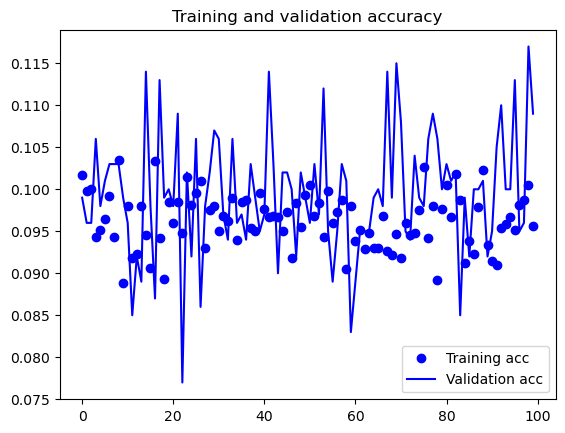

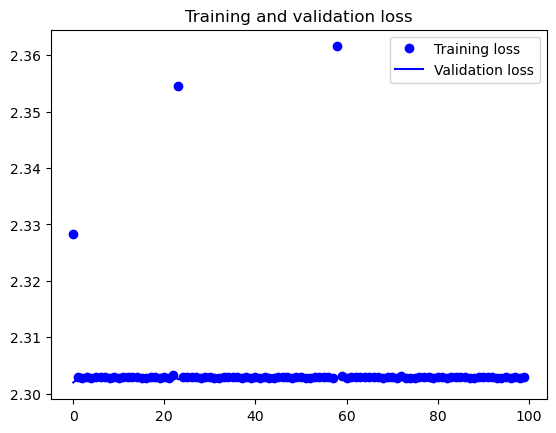

In [33]:
# Plot the Training and Validation Accuracy & Loss Scores
import matplotlib.pyplot as plt
%matplotlib inline

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

#### Model 2b Conclusion

In [34]:
# Conclusion for 2b
# When allowing the VGG16 model to learn the weights of the data, the model 2b became unable to learn anything meaningful from the images. 
# The validation curves show the model was randomly classifying the images as the model is unable to learn the representations from the image data. 
# The accuracy did not reach past 12% indicating extremely poor performance. 
# This means that unfreezing the conv layer and allowing the weights of the VGG16 model to be updated based on the image data is ill-advised for this problem.


In [35]:
# Save the Model
model.save('food_model_2b.h5')

#### Model 2c (ResNet with Frozen Layers) (Without Data Augmenation)

In [8]:
# Build the Model 2c
# note: Re-build the base model
# Import Pre-Trained Conv (ResNet)
# increase steps per epoch to original value (375) as observed that model would train better with more steps
# Freeze the conv_base layer
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input

conv_base = ResNet50(weights='imagenet',
                  include_top=False,
                  input_shape=(img_size, img_size, 3))

# Model 2c
model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

# Summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 5, 5, 2048)        23587712  
                                                                 
 flatten (Flatten)           (None, 51200)             0         
                                                                 
 dense (Dense)               (None, 256)               13107456  
                                                                 
 dense_1 (Dense)             (None, 10)                2570      
                                                                 
Total params: 36,697,738
Trainable params: 36,644,618
Non-trainable params: 53,120
_________________________________________________________________


In [9]:
# Freeze the Pre-Trained Layer
conv_base.trainable = False
# Summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 5, 5, 2048)        23587712  
                                                                 
 flatten (Flatten)           (None, 51200)             0         
                                                                 
 dense (Dense)               (None, 256)               13107456  
                                                                 
 dense_1 (Dense)             (None, 10)                2570      
                                                                 
Total params: 36,697,738
Trainable params: 13,110,026
Non-trainable params: 23,587,712
_________________________________________________________________


In [12]:
# Data Augmentation

from tensorflow.keras.preprocessing.image import ImageDataGenerator
'''
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')
'''

"\ntrain_datagen = ImageDataGenerator(\n    rescale=1./255,\n    rotation_range=40,\n    width_shift_range=0.2,\n    height_shift_range=0.2,\n    shear_range=0.2,\n    zoom_range=0.2,\n    horizontal_flip=True,\n    fill_mode='nearest')\n"

In [13]:
# Train the Model

# Compile the model
# categorical_crossentropy
model.compile(loss='categorical_crossentropy',
              optimizer= 'adam',
              metrics=['acc'])

# Data Pre-processing
# Train already rescaled
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        # All images will be resized to 150x150
        target_size=(img_size, img_size),
        batch_size=20,
        class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(img_size, img_size),
        batch_size=20,
        class_mode='categorical')


Found 7500 images belonging to 10 classes.
Found 2000 images belonging to 10 classes.


In [14]:
# Check generator shapes
for data_batch, labels_batch in train_generator:
    print('Data Batch Shape:', data_batch.shape)
    tmp_plot=data_batch[0]
    print('Labels Batch Shape:', labels_batch.shape)
    break

Data Batch Shape: (20, 150, 150, 3)
Labels Batch Shape: (20, 10)


In [15]:
# Fit the model
# 100 epoch
history = model.fit(
      train_generator,
      steps_per_epoch=375, #train_sample_size=7500/data_batch_size=20 (recalibrated)
      epochs=100, # reduce
      validation_data=validation_generator,
      validation_steps=50) 

Epoch 1/100
375/375 [==============================] - 49s 96ms/step - loss: 2.4160 - acc: 0.1080 - val_loss: 2.3028 - val_acc: 0.0980
Epoch 2/100
375/375 [==============================] - 30s 79ms/step - loss: 2.3022 - acc: 0.1000 - val_loss: 2.3137 - val_acc: 0.1030
Epoch 3/100
375/375 [==============================] - 30s 79ms/step - loss: 2.3017 - acc: 0.1016 - val_loss: 2.3029 - val_acc: 0.0960
Epoch 4/100
375/375 [==============================] - 30s 79ms/step - loss: 2.3018 - acc: 0.1008 - val_loss: 2.3027 - val_acc: 0.0870
Epoch 5/100
375/375 [==============================] - 30s 79ms/step - loss: 2.3002 - acc: 0.1007 - val_loss: 2.2993 - val_acc: 0.1080
Epoch 6/100
375/375 [==============================] - 30s 80ms/step - loss: 2.3008 - acc: 0.0960 - val_loss: 2.3024 - val_acc: 0.0910
Epoch 7/100
375/375 [==============================] - 29s 78ms/step - loss: 2.2988 - acc: 0.0984 - val_loss: 2.2867 - val_acc: 0.1180
Epoch 8/100
375/375 [==============================] - 

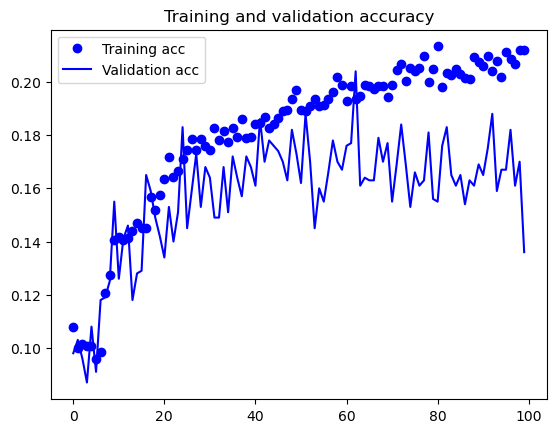

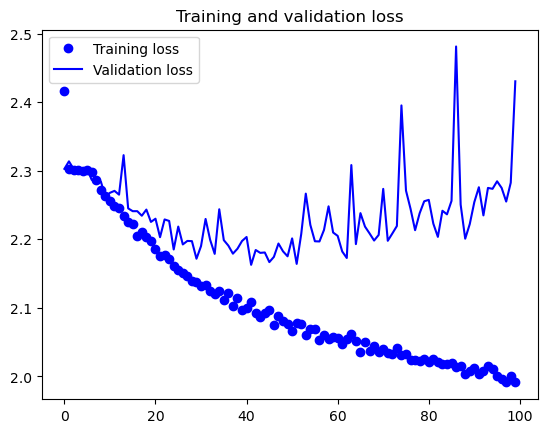

In [16]:
# Plot the Training and Validation Accuracy & Loss Scores
import matplotlib.pyplot as plt
%matplotlib inline

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

#### Model 2c Conclusion

In [17]:
# Conclusion for 2c
# The model 2c using the ResNet model was tested with the same parameters as the previous iterations of model 2. However, the number of steps per epoch was increased to its original value of 375. 
# Apart from this change, the model parameters were kept the same with data augmentation. The ResNet layer was also frozen to compare the changes after unfreezing
# However, when the model was trained with augmented data, the validation accuracy was extremely poor, around 9-11% at the 40-50th epoch.
# This led me to believe that the ResNet model may not work well with the augmented data of these images.

# Terminating the model and testing it without data augmentation did not improve the validation accuracy significantly as it only managed to peak at 19%, with over fitting beginning around the 50th epoch.
# The next iteration of the model will be testing the same ResNet model with the ResNet layer unfrozen. 
# This is to see if the model will be able to classify better if we allow it to learn the images and update the weights.

In [18]:
# Save the Model
model.save('food_model_2c.h5')

#### Model 2d (ResNet with Unfrozen Layers) (Without Data Augmentation)

In [13]:
# Build the Model 2d
# note: Re-build the base model
# Import Pre-Trained Conv (ResNet)
# Unfreeze the conv_base layer
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input

conv_base = ResNet50(weights='imagenet',
                  include_top=False,
                  input_shape=(img_size, img_size, 3))

# Model 2d
model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

# Summary
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 5, 5, 2048)        23587712  
                                                                 
 flatten_1 (Flatten)         (None, 51200)             0         
                                                                 
 dense_2 (Dense)             (None, 256)               13107456  
                                                                 
 dense_3 (Dense)             (None, 10)                2570      
                                                                 
Total params: 36,697,738
Trainable params: 36,644,618
Non-trainable params: 53,120
_________________________________________________________________


In [14]:
# Unfreeze the Pre-Trained Layer
conv_base.trainable = True

set_trainable = False
for layer in conv_base.layers:
    if layer.name == 'add_15':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False
# Summary
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 5, 5, 2048)        23587712  
                                                                 
 flatten_1 (Flatten)         (None, 51200)             0         
                                                                 
 dense_2 (Dense)             (None, 256)               13107456  
                                                                 
 dense_3 (Dense)             (None, 10)                2570      
                                                                 
Total params: 36,697,738
Trainable params: 13,110,026
Non-trainable params: 23,587,712
_________________________________________________________________


In [15]:
# Train the Model

# Compile the model
# categorical_crossentropy
model.compile(loss='categorical_crossentropy',
              optimizer= 'adam',
              metrics=['acc'])

# Data Pre-processing
# Train already rescaled
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        # All images will be resized to 150x150
        target_size=(img_size, img_size),
        batch_size=20,
        class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(img_size, img_size),
        batch_size=20,
        class_mode='categorical')


Found 7500 images belonging to 10 classes.
Found 2000 images belonging to 10 classes.


In [16]:
# Check generator shapes
for data_batch, labels_batch in train_generator:
    print('Data Batch Shape:', data_batch.shape)
    tmp_plot=data_batch[0]
    print('Labels Batch Shape:', labels_batch.shape)
    break

Data Batch Shape: (20, 150, 150, 3)
Labels Batch Shape: (20, 10)


In [17]:
# Fit the model
# 100 epoch
history = model.fit(
      train_generator,
      steps_per_epoch=375, #train_sample_size=7500/data_batch_size=20 (recalibrated)
      epochs=100, # reduce
      validation_data=validation_generator,
      validation_steps=50) 

Epoch 1/100
375/375 [==============================] - 53s 106ms/step - loss: 2.4073 - acc: 0.1263 - val_loss: 2.2894 - val_acc: 0.0990
Epoch 2/100
375/375 [==============================] - 31s 83ms/step - loss: 2.2736 - acc: 0.1316 - val_loss: 2.2984 - val_acc: 0.1210
Epoch 3/100
375/375 [==============================] - 31s 82ms/step - loss: 2.2460 - acc: 0.1451 - val_loss: 2.2545 - val_acc: 0.1390
Epoch 4/100
375/375 [==============================] - 31s 84ms/step - loss: 2.2232 - acc: 0.1757 - val_loss: 2.2213 - val_acc: 0.1870
Epoch 5/100
375/375 [==============================] - 31s 81ms/step - loss: 2.2044 - acc: 0.1836 - val_loss: 2.3565 - val_acc: 0.1510
Epoch 6/100
375/375 [==============================] - 31s 84ms/step - loss: 2.1904 - acc: 0.1897 - val_loss: 2.1808 - val_acc: 0.1820
Epoch 7/100
375/375 [==============================] - 29s 78ms/step - loss: 2.1803 - acc: 0.1944 - val_loss: 2.1849 - val_acc: 0.1800
Epoch 8/100
375/375 [==============================] -

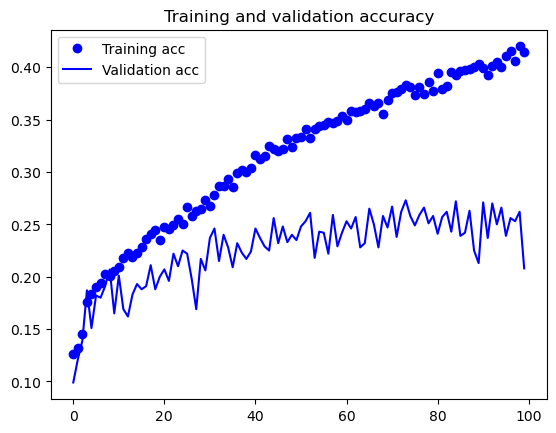

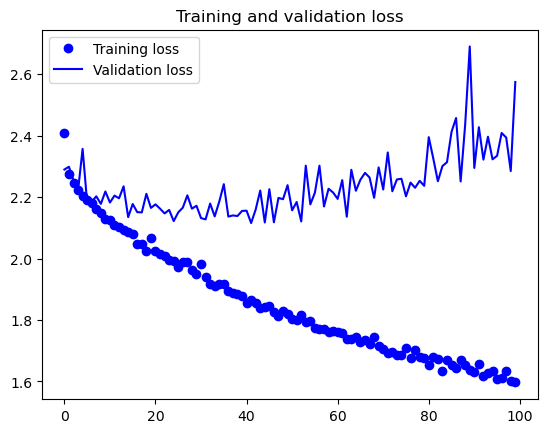

In [18]:
# Plot the Training and Validation Accuracy & Loss Scores
import matplotlib.pyplot as plt
%matplotlib inline

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

#### Model 2d Conclusion

In [19]:
# Conclusion for 2d
# When testing the model 2d with the unfrozen ReNet layer, the model was able to learn and classify the images slightly better than the previous iteration where the ResNet layer was frozen. 
# The model was able to achieve a validation accuracy of 25%, with overfitting starting around the 50th epoch. 
# The validation accuracy of the model is still quite poor and leaves much to be desired. 
# However, this indicates that the ResNet model performs better when the weights are updates in this problem.
# Instead of trying to further optimize this model, it would be more efficient to test another pre-trained model that may fit the data better.


In [20]:
# Save the Model
model.save('food_model_2d.h5')

#### Model 2e (InceptionV3 with Frozen Layers)

In [7]:
# Build the Model 2e
# note: Re-build the base model
# Import Pre-Trained Conv (InceptionV3)
# Freeze the conv_base layer
from tensorflow.keras.applications import InceptionV3
img_size =150

conv_base = InceptionV3(weights='imagenet',
                  include_top=False,
                  input_shape=(img_size, img_size, 3))

# Model 2e
model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

# Summary
model.summary()

87910968/87910968 [==============================] - 11s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 3, 3, 2048)        21802784  
                                                                 
 flatten (Flatten)           (None, 18432)             0         
                                                                 
 dense (Dense)               (None, 256)               4718848   
                                                                 
 dense_1 (Dense)             (None, 10)                2570      
                                                                 
Total params: 26,524,202
Trainable params: 26,489,770
Non-trainable params: 34,432
_________________________________________________________________


In [8]:
# Freeze the Pre-Trained Layer
conv_base.trainable = False
# Summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 3, 3, 2048)        21802784  
                                                                 
 flatten (Flatten)           (None, 18432)             0         
                                                                 
 dense (Dense)               (None, 256)               4718848   
                                                                 
 dense_1 (Dense)             (None, 10)                2570      
                                                                 
Total params: 26,524,202
Trainable params: 4,721,418
Non-trainable params: 21,802,784
_________________________________________________________________


In [9]:
# Data Augmentation
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

In [10]:
# Train the Model

# Compile the model
# categorical_crossentropy
model.compile(loss='categorical_crossentropy',
              optimizer= 'adam',
              metrics=['acc'])

# Data Pre-processing
# Train already rescaled
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        # All images will be resized to 150x150
        target_size=(img_size, img_size),
        batch_size=20,
        class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(img_size, img_size),
        batch_size=20,
        class_mode='categorical')


Found 7500 images belonging to 10 classes.
Found 2000 images belonging to 10 classes.


In [11]:
# Fit the model
# 100 epoch
history = model.fit(
      train_generator,
      steps_per_epoch=375, #train_sample_size=7500/data_batch_size=20 (recalibrated)
      epochs=100, # reduce
      validation_data=validation_generator,
      validation_steps=50) 

Epoch 1/100
375/375 [==============================] - 82s 182ms/step - loss: 3.0334 - acc: 0.4397 - val_loss: 1.4248 - val_acc: 0.5530
Epoch 2/100
375/375 [==============================] - 62s 166ms/step - loss: 1.3779 - acc: 0.5427 - val_loss: 1.2568 - val_acc: 0.5600
Epoch 3/100
375/375 [==============================] - 66s 177ms/step - loss: 1.2747 - acc: 0.5757 - val_loss: 1.0429 - val_acc: 0.6640
Epoch 4/100
375/375 [==============================] - 67s 179ms/step - loss: 1.1929 - acc: 0.6027 - val_loss: 1.1225 - val_acc: 0.6320
Epoch 5/100
375/375 [==============================] - 66s 175ms/step - loss: 1.1200 - acc: 0.6263 - val_loss: 1.0399 - val_acc: 0.6370
Epoch 6/100
375/375 [==============================] - 64s 169ms/step - loss: 1.0980 - acc: 0.6271 - val_loss: 1.0090 - val_acc: 0.6490
Epoch 7/100
375/375 [==============================] - 62s 166ms/step - loss: 1.0436 - acc: 0.6449 - val_loss: 1.0544 - val_acc: 0.6550
Epoch 8/100
375/375 [===========================

Epoch 61/100
375/375 [==============================] - 59s 158ms/step - loss: 0.8192 - acc: 0.7243 - val_loss: 1.0180 - val_acc: 0.6860
Epoch 62/100
375/375 [==============================] - 60s 159ms/step - loss: 0.8107 - acc: 0.7269 - val_loss: 0.9791 - val_acc: 0.6880
Epoch 63/100
375/375 [==============================] - 59s 158ms/step - loss: 0.8093 - acc: 0.7335 - val_loss: 0.9661 - val_acc: 0.6860
Epoch 64/100
375/375 [==============================] - 60s 159ms/step - loss: 0.8212 - acc: 0.7257 - val_loss: 1.0030 - val_acc: 0.7000
Epoch 65/100
375/375 [==============================] - 59s 158ms/step - loss: 0.8131 - acc: 0.7288 - val_loss: 1.0194 - val_acc: 0.6890
Epoch 66/100
375/375 [==============================] - 61s 164ms/step - loss: 0.8040 - acc: 0.7389 - val_loss: 1.0481 - val_acc: 0.6690
Epoch 67/100
375/375 [==============================] - 62s 164ms/step - loss: 0.8104 - acc: 0.7304 - val_loss: 0.9721 - val_acc: 0.6980
Epoch 68/100
375/375 [===================

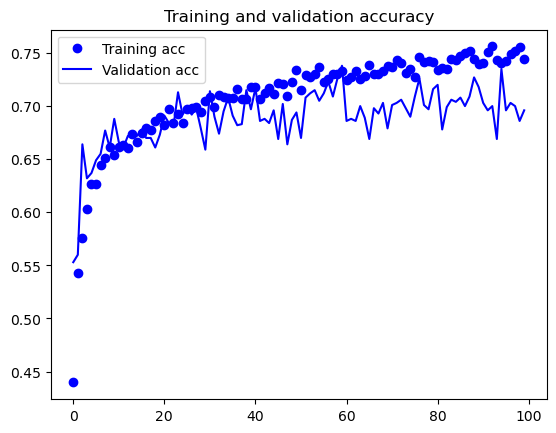

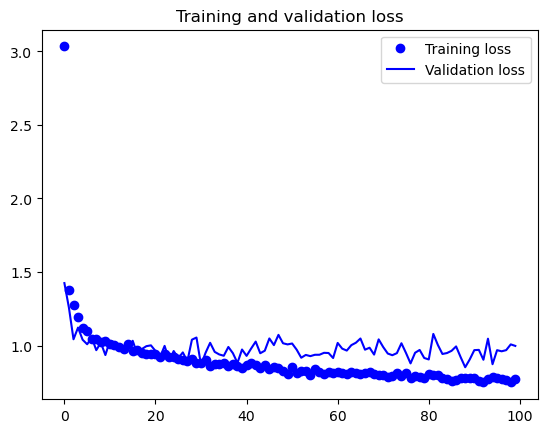

In [12]:
# Plot the Training and Validation Accuracy & Loss Scores
import matplotlib.pyplot as plt
%matplotlib inline

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

#### Model 2e Conclusion

In [13]:
# Conclusion for 2e
# The model was tested with the same parameters as the ResNet model, with the inclusion of data augmentation to further improve the accuracy by allowing the model to train on a larger range of data. 
# After running and evaluating the model on its validation curves, the validation accuracy hit around 71% on the dataset and the loss seems to show minimal overfitting. 
# The next iteration of the model will unfreeze the pre-trained InceptionV3 layer, 
# to allow it to better adjust the weights of the model, to further learn the data and optimize the accuracy of the model.

In [14]:
# Save the Model
model.save('food_model_2e.h5')

#### Model 2f (InceptionV3 with Unfrozen Layers)

In [21]:
# Build the Model 2f
# note: Re-build the base model
# Import Pre-Trained Conv (InceptionV3)
# Unfreeze the conv_base layer
from tensorflow.keras.applications import InceptionV3
img_size =150

conv_base = InceptionV3(weights='imagenet',
                  include_top=False,
                  input_shape=(img_size, img_size, 3))

# Model 2f
model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

# Summary
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 3, 3, 2048)        21802784  
                                                                 
 flatten_2 (Flatten)         (None, 18432)             0         
                                                                 
 dense_4 (Dense)             (None, 256)               4718848   
                                                                 
 dense_5 (Dense)             (None, 10)                2570      
                                                                 
Total params: 26,524,202
Trainable params: 26,489,770
Non-trainable params: 34,432
_________________________________________________________________


In [22]:
# Unfreeze the Pre-Trained Layer
conv_base.trainable = True

set_trainable = False
for layer in conv_base.layers:
    if layer.name == 'mixed6':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False
# Summary
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 3, 3, 2048)        21802784  
                                                                 
 flatten_2 (Flatten)         (None, 18432)             0         
                                                                 
 dense_4 (Dense)             (None, 256)               4718848   
                                                                 
 dense_5 (Dense)             (None, 10)                2570      
                                                                 
Total params: 26,524,202
Trainable params: 19,673,354
Non-trainable params: 6,850,848
_________________________________________________________________


In [23]:
# Data Augmentation
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

In [24]:
# Train the Model

# Compile the model
# categorical_crossentropy
model.compile(loss='categorical_crossentropy',
              optimizer= 'adam',
              metrics=['acc'])

# Data Pre-processing
# Train already rescaled
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        # All images will be resized to 150x150
        target_size=(img_size, img_size),
        batch_size=20,
        class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(img_size, img_size),
        batch_size=20,
        class_mode='categorical')

Found 7500 images belonging to 10 classes.
Found 2000 images belonging to 10 classes.


In [25]:
# Fit the model
# 100 epoch
history = model.fit(
      train_generator,
      steps_per_epoch=375, #train_sample_size=7500/data_batch_size=20 (recalibrated)
      epochs=100, # reduce
      validation_data=validation_generator,
      validation_steps=50) 

Epoch 1/100
375/375 [==============================] - 64s 155ms/step - loss: 1.5625 - acc: 0.5671 - val_loss: 2.6810 - val_acc: 0.6330
Epoch 2/100
375/375 [==============================] - 58s 153ms/step - loss: 0.9434 - acc: 0.6969 - val_loss: 0.9459 - val_acc: 0.7270
Epoch 3/100
375/375 [==============================] - 58s 155ms/step - loss: 0.7940 - acc: 0.7424 - val_loss: 0.7531 - val_acc: 0.7510
Epoch 4/100
375/375 [==============================] - 60s 159ms/step - loss: 0.7435 - acc: 0.7587 - val_loss: 0.7246 - val_acc: 0.7550
Epoch 5/100
375/375 [==============================] - 63s 167ms/step - loss: 0.6660 - acc: 0.7819 - val_loss: 0.6391 - val_acc: 0.7980
Epoch 6/100
375/375 [==============================] - 61s 163ms/step - loss: 0.6149 - acc: 0.8016 - val_loss: 0.6816 - val_acc: 0.7990
Epoch 7/100
375/375 [==============================] - 64s 169ms/step - loss: 0.5991 - acc: 0.8088 - val_loss: 0.6802 - val_acc: 0.8090
Epoch 8/100
375/375 [===========================

Epoch 61/100
375/375 [==============================] - 59s 158ms/step - loss: 0.1428 - acc: 0.9545 - val_loss: 0.8475 - val_acc: 0.8260
Epoch 62/100
375/375 [==============================] - 63s 169ms/step - loss: 0.1314 - acc: 0.9583 - val_loss: 0.8369 - val_acc: 0.8290
Epoch 63/100
375/375 [==============================] - 60s 161ms/step - loss: 0.1369 - acc: 0.9541 - val_loss: 0.8106 - val_acc: 0.8250
Epoch 64/100
375/375 [==============================] - 67s 178ms/step - loss: 0.1231 - acc: 0.9605 - val_loss: 0.8923 - val_acc: 0.8160
Epoch 65/100
375/375 [==============================] - 61s 162ms/step - loss: 0.1423 - acc: 0.9551 - val_loss: 0.9244 - val_acc: 0.8060
Epoch 66/100
375/375 [==============================] - 62s 165ms/step - loss: 0.1300 - acc: 0.9552 - val_loss: 0.8162 - val_acc: 0.8150
Epoch 67/100
375/375 [==============================] - 62s 164ms/step - loss: 0.1189 - acc: 0.9579 - val_loss: 0.7999 - val_acc: 0.8230
Epoch 68/100
375/375 [===================

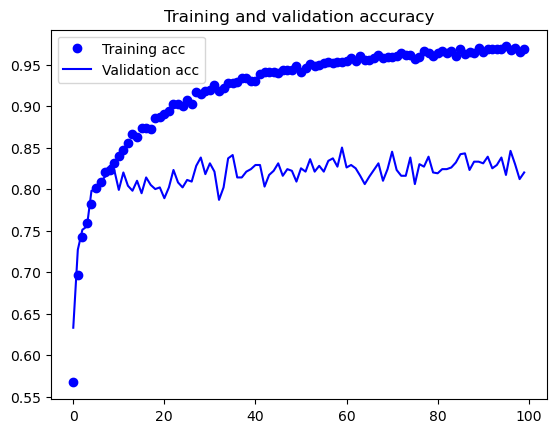

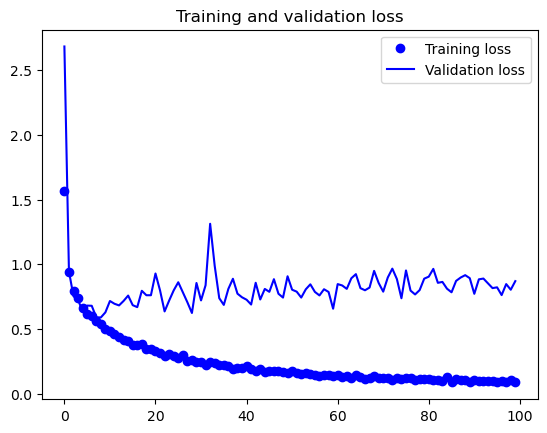

In [26]:
# Plot the Training and Validation Accuracy & Loss Scores
import matplotlib.pyplot as plt
%matplotlib inline

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

#### Model 2f Conclusion

In [27]:
# Conclusion for 2f
# After unfreezing the layers from “mixed 6” and running the model on the data, the model was adjust its learning weights to better learn and classify the images. 
# The model was able to achieve a validation accuracy of around 82% on the data.
# Examining the validation curves, it is observed that the model has minimal overfitting, but the validation accuracy stagnates around 80%.
# Overall, this is the most accurate model among the iterations tested and will be useful for prediction as it achieved a satisfactory validation accuracy.


In [28]:
# Save the Model
model.save('food_model_2f.h5')

## Step 3 – Evaluate the Developed Models using Testing Images

In [8]:
img_size = 150
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [11]:
# Model #1 (f) (65% acc)
model1 = keras.models.load_model('food_model_1f.h5')
test_datagen = ImageDataGenerator(rescale=1./255) # 500 images
test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(img_size, img_size),
        batch_size=20,
        class_mode='categorical')

test_loss, test_acc = model1.evaluate(test_generator, steps=25)# 500/20
print('Test Accuracy of Model 1f:', test_acc)



Found 500 images belonging to 10 classes.
25/25 [==============================] - 2s 65ms/step - loss: 1.4978 - acc: 0.4740
Test Accuracy of Model 1f: 0.4740000069141388


In [ ]:
# Conclusion:
# The CNN model evaluated is model 1f. It was the model with the highest accuracy and minimal overfitting among the CNN models built for model 1 that was tested.
# When evaluated on test data, it is observed that the accuracy of the model has dropped considerably, from 65% to 47%. 
# This may indicate that the model has not fully grasped and learnt the data during training and validation. 
# Moreover, accuracy under 50% is trivial and would not be useful for making predictions.
# Additional improvements and optimizations should be made to further improve the model’s performance.

In [13]:
# Model #2 (f) (81% acc)
model2 = keras.models.load_model('food_model_2f.h5')
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(img_size, img_size),
        batch_size=20,
        class_mode='categorical')

test_loss, test_acc = model2.evaluate(test_generator, steps=25)
print('Test Accuracy of Model 2f:', test_acc)



Found 500 images belonging to 10 classes.
25/25 [==============================] - 3s 66ms/step - loss: 0.8296 - acc: 0.8240
Test Accuracy of Model 2f: 0.8240000009536743


In [14]:
# Conclusion:
# For model 2, model 2f was used as the InceptionV3 pre-trained model with unfrozen layers was able to provide the best accuracy and performance among the models tested.
# When evaluating on unseen test data, it is clear that the model has successfully been trained on the dataset.
# The test accuracy of the model is 82%. Compared to the validation accuracy of 81-85%, it can been said that the model has good performance. 
# This is means that the model is more than 80% accurate when predicting on unseen data, thus making model 2f the better model for prediction when comparing the two.

In [15]:
# Save the best model (Model 2f)

model2.save('food_model_best.h5')

## Step 4  – Use the best model to make prediction

In [7]:
# Load the model
model = keras.models.load_model('food_model_best.h5')

In [8]:
# Load the food list (in alphabetical order)
with open('15.txt', 'r') as f: # the .txt file which contains a list of food assigned to you
    x = f.readlines()
food_list =[]
for item in x:
    food_list.append(item.strip('\n'))
food_list = sorted(food_list) # food_list needs to be sorted alphabetically before feed into prediction() function
print(food_list)

['beef_carpaccio', 'breakfast_burrito', 'churros', 'crab_cakes', 'fish_and_chips', 'omelette', 'pancakes', 'panna_cotta', 'poutine', 'takoyaki']


In [9]:
# Define some related functions for image process and model prediction
from tensorflow.keras.preprocessing.image import load_img, img_to_array
def image_process(img):
    image = load_img(img, target_size =(img_size, img_size))
    image_array = img_to_array(image)/255
    return image_array

import pandas as pd
def prediction(model, img_array, items_l):
    prob = model.predict(img_array.reshape(1,img_size,img_size,3))
    pro_df = pd.DataFrame(prob, columns = items_l)
    result = items_l[np.argmax(prob)]
    return pro_df, result

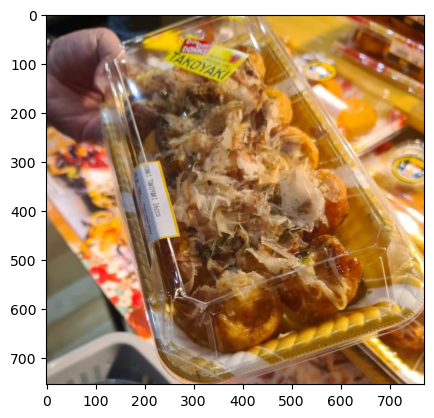

1/1 [==============================] - 2s 2s/step
The prediction is:  takoyaki 

    beef_carpaccio  breakfast_burrito   churros  crab_cakes  fish_and_chips  \
0        0.000002           0.000003  0.000011    0.000008    9.229904e-07   

   omelette      pancakes   panna_cotta  poutine  takoyaki  
0  0.000002  5.298271e-07  2.274908e-07  0.10734  0.892632  


In [21]:
# Make prediction for the image you downloaded from internet (image 1) (from phone)
import matplotlib.pyplot as plt
img = 'tako1.jpg' # the picture you downloaded from internet, which contains a type of food in your food list
plt.imshow(plt.imread(img))
plt.show()

img_array = image_process(img)
prob_df, result = prediction(model, img_array, food_list)
print('The prediction is: ', result, '\n\n', prob_df)

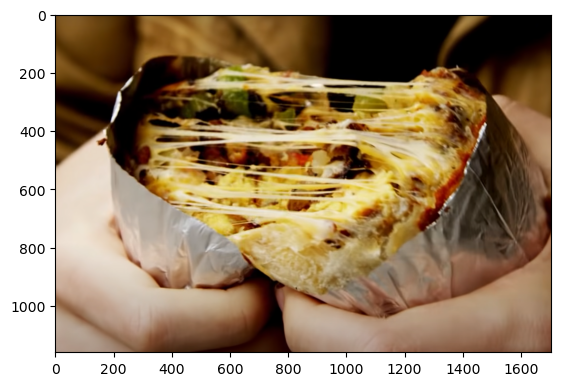

1/1 [==============================] - 0s 33ms/step
The prediction is:  breakfast_burrito 

    beef_carpaccio  breakfast_burrito       churros  crab_cakes  \
0    5.267073e-07           0.999985  1.523169e-07    0.000007   

   fish_and_chips  omelette      pancakes   panna_cotta   poutine  \
0        0.000003  0.000001  2.176574e-08  7.445366e-07  0.000002   

       takoyaki  
0  1.937526e-07  


In [24]:
# Make prediction for the image you downloaded from internet (image 2) (from internet)
import matplotlib.pyplot as plt
img = 'bur1.png' # the picture you downloaded from internet, which contains a type of food in your food list
plt.imshow(plt.imread(img))
plt.show()

img_array = image_process(img)
prob_df, result = prediction(model, img_array, food_list)
print('The prediction is: ', result, '\n\n', prob_df)

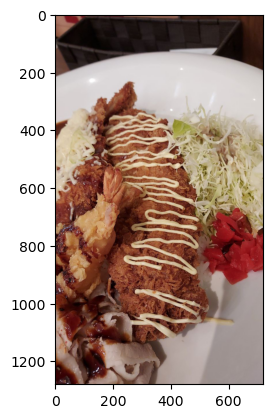

1/1 [==============================] - 12s 12s/step
The prediction is:  fish_and_chips 

    beef_carpaccio  breakfast_burrito   churros  crab_cakes  fish_and_chips  \
0        0.046213           0.037325  0.025882    0.022566        0.555571   

   omelette  pancakes  panna_cotta   poutine  takoyaki  
0   0.17762  0.013784     0.019075  0.046453  0.055511  


In [11]:
# Make prediction for the image you downloaded from internet (image 3) (from internet)
import matplotlib.pyplot as plt
img = 'feesh1.jpg' # the picture you downloaded from internet, which contains a type of food in your food list
plt.imshow(plt.imread(img))
plt.show()

img_array = image_process(img)
prob_df, result = prediction(model, img_array, food_list)
print('The prediction is: ', result, '\n\n', prob_df)